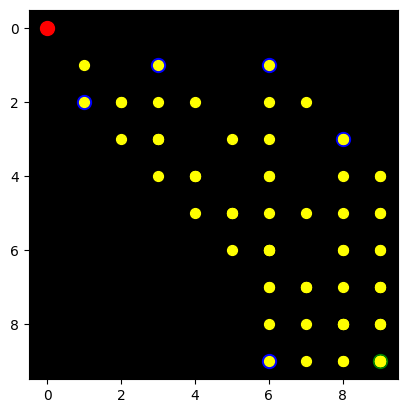

Execution time: 0.51 seconds


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time

start_time = time.time()
# Settings
grid_size = 10
num_humans = 5
robot_start = (0, 0)
exit_position = (grid_size - 1, grid_size - 1)

# Initialize grid
grid = np.zeros((grid_size, grid_size))

def place_humans(grid_size, num_humans, robot_start, exit_position):
    available_positions = {(i, j) for i in range(grid_size) for j in range(grid_size)}
    available_positions.remove(robot_start)
    available_positions.remove(exit_position)
    return random.sample(available_positions, num_humans)

# Place humans randomly in the grid
human_positions = []
for _ in range(num_humans):
    while True:
        pos = (random.randint(0, grid_size - 1), random.randint(0, grid_size - 1))
        if pos not in human_positions and pos != robot_start and pos != exit_position:
            human_positions.append(pos)
            break

# Function to display the grid
def display_grid(robot_pos, path=[]):
    plt.imshow(grid, cmap='gray')
    for pos in human_positions:
        plt.scatter(pos[1], pos[0], color='blue', s=100)  # Humans in blue
    plt.scatter(exit_position[1], exit_position[0], color='green', s=100)  # Exit in green
    plt.scatter(robot_pos[1], robot_pos[0], color='red', s=100)  # Robot in red
    if path:
        for step in path:
            plt.scatter(step[1], step[0], color='yellow', s=50)  # Path in yellow
    plt.show()

# Simple path planning towards a target
def plan_path(start, target):
    path = []
    current_pos = start
    while current_pos != target:
        dx = np.sign(target[0] - current_pos[0])
        dy = np.sign(target[1] - current_pos[1])
        current_pos = (current_pos[0] + dx, current_pos[1] + dy)
        path.append(current_pos)
    return path

# Main simulation function
def simulate_evacuation():
    robot_pos = robot_start
    all_paths = []
    
    # Move towards each human and then to the exit
    for human in human_positions:
        path_to_human = plan_path(robot_pos, human)
        all_paths.extend(path_to_human)
        robot_pos = human  # Simulate reaching the human
        
        path_to_exit = plan_path(robot_pos, exit_position)
        all_paths.extend(path_to_exit)
        robot_pos = exit_position  # Simulate reaching the exit
    
    display_grid(robot_start, all_paths)

if __name__ == '__main__':
    simulate_evacuation()

end_time = time.time()
print("Execution time: {:.2f} seconds".format(end_time - start_time))

In [2]:
# path_planning.py

import heapq

def get_neighbors(pos, obstacles, grid_size):
    neighbors = []
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # 4-directional movement
    for dx, dy in directions:
        next_pos = (pos[0] + dx, pos[1] + dy)
        if 0 <= next_pos[0] < grid_size and 0 <= next_pos[1] < grid_size and next_pos not in obstacles:
            neighbors.append(next_pos)
    return neighbors

def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def a_star(start, goal, obstacles, grid_size):
    frontier = []
    heapq.heappush(frontier, (0, start))
    came_from = {start: None}
    cost_so_far = {start: 0}
    
    while frontier:
        current = heapq.heappop(frontier)[1]
        
        if current == goal:
            break
        
        for next in get_neighbors(current, obstacles, grid_size):
            new_cost = cost_so_far[current] + 1
            if next not in cost_so_far or new_cost < cost_so_far[next]:
                cost_so_far[next] = new_cost
                priority = new_cost + heuristic(goal, next)
                heapq.heappush(frontier, (priority, next))
                came_from[next] = current
    
    return reconstruct_path(start, goal, came_from)
    
def reconstruct_path(start, goal, came_from):
    current = goal
    path = []
    while current != start:
        path.append(current)
        current = came_from[current]
    path.append(start)
    path.reverse()
    return path

def update_and_recompute(start, goal, obstacles, grid_size, new_obstacles):
    obstacles.update(new_obstacles)
    return a_star(start, goal, obstacles, grid_size)
    
    # # Reconstruct path
    # current = goal
    # path = []
    # while current != start:
    #     path.append(current)
    #     current = came_from[current]
    # path.append(start)
    # path.reverse()
    # return path

if __name__ == "__main__":
    # Example usage
    obstacles = {(1, 2), (2, 2), (3, 2)}
    start, goal = (0, 0), (4, 4)
    path = a_star(start, goal, obstacles, grid_size=5)
    print("Path found:", path)

    new_obstacles = {(2, 3), (3, 3)}
    path = update_and_recompute(start, goal, obstacles, grid_size=5, new_obstacles=new_obstacles)
    print("Updated path found:", path)

Path found: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 4), (2, 4), (3, 4), (4, 4)]
Updated path found: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 4), (2, 4), (3, 4), (4, 4)]


In [3]:
import heapq
import time

class AStarDynamic:
    def __init__(self, start, goal, obstacles, grid_size):
        self.start = start
        self.goal = goal
        self.obstacles = set(obstacles)
        self.grid_size = grid_size
        self.directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]

    def get_neighbors(self, pos):
        neighbors = []
        for dx, dy in self.directions:
            next_pos = (pos[0] + dx, pos[1] + dy)
            if 0 <= next_pos[0] < self.grid_size and 0 <= next_pos[1] < self.grid_size and next_pos not in self.obstacles:
                neighbors.append(next_pos)
        return neighbors

    def heuristic(self, a, b):
        return abs(a[0] - b[0]) + abs(a[1] - b[1])

    def a_star(self, start, goal):
        frontier = []
        heapq.heappush(frontier, (0, start))
        came_from = {start: None}
        cost_so_far = {start: 0}
        
        while frontier:
            current = heapq.heappop(frontier)[1]
            
            if current == goal:
                break
            
            for next in self.get_neighbors(current):
                new_cost = cost_so_far[current] + 1
                if next not in cost_so_far or new_cost < cost_so_far[next]:
                    cost_so_far[next] = new_cost
                    priority = new_cost + self.heuristic(goal, next)
                    heapq.heappush(frontier, (priority, next))
                    came_from[next] = current
        
        return self.reconstruct_path(came_from, start, goal)

    def reconstruct_path(self, came_from, start, goal):
        current = goal
        path = []
        while current != start:
            path.append(current)
            current = came_from[current]
        path.append(start)
        path.reverse()
        return path

    def find_path(self):
        return self.a_star(self.start, self.goal)

    def update_obstacles(self, new_obstacles):
        self.obstacles.update(new_obstacles)

if __name__ == "__main__":
    obstacles = {(1, 2), (2, 2), (3, 2)}
    new_obstacles = {(1, 3), (1, 4)}
    start, goal = (0, 0), (4, 4)
    grid_size = 5

    # A* Dynamic
    print("Running A* Dynamic...")
    astar_time_start = time.time()
    astar_dynamic = AStarDynamic(start, goal, obstacles, grid_size)
    astar_path = astar_dynamic.find_path()
    astar_dynamic.update_obstacles(new_obstacles)
    astar_path_updated = astar_dynamic.find_path()
    astar_time_end = time.time()
    print("Initial A* Path:", astar_path)
    print("Updated A* Path:", astar_path_updated)
    print("A* Execution Time:", astar_time_end - astar_time_start)


Running A* Dynamic...
Initial A* Path: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 4), (2, 4), (3, 4), (4, 4)]
Updated A* Path: [(0, 0), (0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (4, 2), (4, 3), (4, 4)]
A* Execution Time: 0.0


In [4]:
import heapq
import time

class PathfindingBase:
    def __init__(self, start, goal, obstacles, grid_size):
        self.start = start
        self.goal = goal
        self.grid_size = grid_size
        self.obstacles = set(obstacles)
        self.directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]

    def heuristic(self, a, b):
        return abs(a[0] - b[0]) + abs(a[1] - b[1])

    def get_neighbors(self, pos):
        neighbors = []
        for dx, dy in self.directions:
            next_pos = (pos[0] + dx, pos[1] + dy)
            if 0 <= next_pos[0] < self.grid_size and 0 <= next_pos[1] < self.grid_size and next_pos not in self.obstacles:
                neighbors.append(next_pos)
        return neighbors

    def update_obstacles(self, new_obstacles):
        self.obstacles.update(new_obstacles)

class AStarDynamic(PathfindingBase):
    def find_path(self):
        frontier = []
        heapq.heappush(frontier, (0, self.start))
        came_from = {self.start: None}
        cost_so_far = {self.start: 0}

        while frontier:
            current = heapq.heappop(frontier)[1]
            if current == self.goal:
                break
            for next in self.get_neighbors(current):
                new_cost = cost_so_far[current] + 1
                if next not in cost_so_far or new_cost < cost_so_far[next]:
                    cost_so_far[next] = new_cost
                    priority = new_cost + self.heuristic(self.goal, next)
                    heapq.heappush(frontier, (priority, next))
                    came_from[next] = current

        return self.reconstruct_path(came_from)

    def reconstruct_path(self, came_from):
        current = self.goal
        path = []
        while current != self.start:
            path.append(current)
            current = came_from[current]
        path.append(self.start)
        path.reverse()
        return path

class DStarLite(PathfindingBase):
    def __init__(self, start, goal, grid_size, obstacles):
        super().__init__(start, goal, obstacles, grid_size)
        self.U = []
        self.km = 0
        self.rhs = {node: float('inf') for node in self.generate_nodes()}
        self.g = {node: float('inf') for node in self.generate_nodes()}
        self.rhs[self.goal] = 0
        heapq.heappush(self.U, (self.calculate_key(self.goal), self.goal))

    def generate_nodes(self):
        return [(x, y) for x in range(self.grid_size) for y in range(self.grid_size)]

    def calculate_key(self, node):
        return (min(self.g[node], self.rhs[node]) + self.heuristic(self.start, node), min(self.g[node], self.rhs[node]))

    def update_vertex(self, u):
        if u != self.goal:
            self.rhs[u] = min(self.g[neighbor] + 1 for neighbor in self.get_neighbors(u))
        if (self.calculate_key(u), u) in self.U:
            self.U.remove((self.calculate_key(u), u))
            heapq.heapify(self.U)
        if self.g[u] != self.rhs[u]:
            heapq.heappush(self.U, (self.calculate_key(u), u))

    def compute_shortest_path(self):
        iterations = 0
        while self.U:
            if not self.U:
                print("Priority queue empty. Exiting.")
                break
            if self.U[0][0] >= self.calculate_key(self.start) and self.rhs[self.start] == self.g[self.start]:
                print("Optimal path found or no changes needed.")
                break
            u_tuple = heapq.heappop(self.U)
            u = u_tuple[1]
            if self.g[u] > self.rhs[u]:
                self.g[u] = self.rhs[u]
            else:
                self.g[u] = float('inf')
                for neighbor in self.get_neighbors(u):
                    self.update_vertex(neighbor)

            iterations += 1
            if iterations % 100 == 0:
                print(f"Iteration {iterations}: Processing node {u}")

    def update_vertex(self, u):
        if u != self.goal:
            self.rhs[u] = min(self.g[neighbor] + 1 for neighbor in self.get_neighbors(u))
        in_queue = any(u == item[1] for item in self.U)
        if in_queue:
            self.U = [(k, v) for k, v in self.U if v != u]
            heapq.heapify(self.U)
        if self.g[u] != self.rhs[u]:
            heapq.heappush(self.U, (self.calculate_key(u), u))

    def find_path(self):
        self.compute_shortest_path()
        path = []
        current = self.start
        while current != self.goal:
            path.append(current)
            neighbors = list(self.get_neighbors(current))
            if not neighbors:
                break
            current = min(neighbors, key=lambda n: self.g.get(n, float('inf')) + 1)
        path.append(self.goal)
        return path


In [5]:
import time

def main():
    obstacles = {(1, 2), (2, 2), (3, 2)}
    new_obstacles = {(1, 3), (1, 4)}
    start, goal = (0, 0), (4, 4)
    grid_size = 5

    astar_dynamic = AStarDynamic(start, goal, obstacles, grid_size)
    
    astar_time_start = time.time()
    astar_path = astar_dynamic.find_path()
    astar_time_end = time.time()
    
    astar_dynamic.update_obstacles(new_obstacles)
    
    astar_updated_time_start = time.time()
    astar_updated_path = astar_dynamic.find_path()
    astar_updated_time_end = time.time()

    print("A* Initial Path:", astar_path)
    print("A* Initial Time:", astar_time_end - astar_time_start)
    print("A* Updated Path:", astar_updated_path)
    print("A* Updated Time:", astar_updated_time_end - astar_updated_time_start)

if __name__ == "__main__":
    main()

A* Initial Path: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 4), (2, 4), (3, 4), (4, 4)]
A* Initial Time: 0.0
A* Updated Path: [(0, 0), (0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (4, 2), (4, 3), (4, 4)]
A* Updated Time: 0.0


In [6]:
import time
from collections import deque

class BidirectionalBFS:
    def __init__(self, start, goal, obstacles, grid_size):
        self.start = start
        self.goal = goal
        self.obstacles = set(obstacles)
        self.grid_size = grid_size
        self.directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]

    def get_neighbors(self, pos):
        neighbors = []
        for dx, dy in self.directions:
            next_pos = (pos[0] + dx, pos[1] + dy)
            if 0 <= next_pos[0] < self.grid_size and 0 <= next_pos[1] < self.grid_size and next_pos not in self.obstacles:
                neighbors.append(next_pos)
        return neighbors

    def find_path(self):
        start_time = time.time()

        if self.start == self.goal:
            return [self.start], time.time() - start_time

        frontier_from_start = deque([self.start])
        frontier_from_goal = deque([self.goal])

        visited_from_start = {self.start: None}
        visited_from_goal = {self.goal: None}

        while frontier_from_start and frontier_from_goal:
            if frontier_from_start:
                current_from_start = frontier_from_start.popleft()
                for neighbor in self.get_neighbors(current_from_start):
                    if neighbor not in visited_from_start:
                        visited_from_start[neighbor] = current_from_start
                        frontier_from_start.append(neighbor)
                        if neighbor in visited_from_goal:
                            path = self.reconstruct_path(neighbor, visited_from_start, visited_from_goal)
                            return path, time.time() - start_time
                        
            if frontier_from_goal:
                current_from_goal = frontier_from_goal.popleft()
                for neighbor in self.get_neighbors(current_from_goal):
                    if neighbor not in visited_from_goal:
                        visited_from_goal[neighbor] = current_from_goal
                        frontier_from_goal.append(neighbor)
                        if neighbor in visited_from_start:
                            path = self.reconstruct_path(neighbor, visited_from_start, visited_from_goal)
                            return path, time.time() - start_time

        return None, time.time() - start_time


    def reconstruct_path(self, meeting_point, visited_from_start, visited_from_goal):
        path_from_start = []
        step = meeting_point
        while step is not None:
            path_from_start.append(step)
            step = visited_from_start[step]
        path_from_start.reverse()

        path_from_goal = []
        step = meeting_point
        step = visited_from_goal[step]
        while step is not None:
            path_from_goal.append(step)
            step = visited_from_goal[step]

        return path_from_start + path_from_goal

if __name__ == "__main__":
    obstacles = {(1, 2), (2, 2), (3, 2)}
    start, goal = (0, 0), (4, 4)
    grid_size = 5

    bidirectional_bfs = BidirectionalBFS(start, goal, obstacles, grid_size)
    path, execution_time = bidirectional_bfs.find_path()
    print("Path found:", path)
    print("Execution time:", execution_time, "seconds")

Path found: [(0, 0), (0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (4, 2), (4, 3), (4, 4)]
Execution time: 0.0 seconds


In [7]:
import tkinter as tk
from tkinter import font as tkfont, simpledialog
import random
# from path_planning import a_star

class RobotEvacuationSimulator:
    def __init__(self, master):
        self.grid_size = 20
        self.cell_size = 30
        self.map_size = self.grid_size * self.cell_size
        self.num_obstacles = 40
        self.obstacles = set()
        self.exit_position = (0, 0)  
        self.moving_humans = []
        self.static_humans = set()
        self.robot_start = (self.grid_size // 2, self.grid_size // 2)

        self.master = master
        self.master.title("Robot Evacuation Simulator")
        self.canvas = tk.Canvas(master, width=self.map_size, height=self.map_size, bg='white')
        self.canvas.pack(side=tk.LEFT)

        self.stats_panel = tk.Frame(master, width=200, height=self.map_size)
        self.stats_panel.pack(side=tk.RIGHT, fill=tk.Y, expand=False)
        self.stats_text = tk.Text(self.stats_panel, width=25, height=5, wrap="word")
        self.stats_text.pack(pady=20)
        stats_font = tkfont.Font(family="Helvetica", size=12)
        self.stats_text.configure(font=stats_font)
        self.update_stats(0)

        self.place_obstacles()
        self.exit_position = self.place_exit()
        self.start_simulation()

    def place_obstacles(self):
        while len(self.obstacles) < self.num_obstacles:
            x, y = random.randint(0, self.grid_size - 1), random.randint(0, self.grid_size - 1)
            if (x, y) not in self.obstacles:
                self.obstacles.add((x, y))
                self.canvas.create_rectangle(x * self.cell_size, y * self.cell_size, (x + 1) * self.cell_size, (y + 1) * self.cell_size, fill='grey', outline='black')

    def place_exit(self):
        edge = random.choice(['top', 'bottom', 'left', 'right'])
        if edge == 'top':
            exit_pos = (random.randint(0, self.grid_size - 1), 0)
        elif edge == 'bottom':
            exit_pos = (random.randint(0, self.grid_size - 1), self.grid_size - 1)
        elif edge == 'left':
            exit_pos = (0, random.randint(0, self.grid_size - 1))
        elif edge == 'right':
            exit_pos = (self.grid_size - 1, random.randint(0, self.grid_size - 1))
        
        self.canvas.create_rectangle(exit_pos[0] * self.cell_size, exit_pos[1] * self.cell_size, (exit_pos[0] + 1) * self.cell_size, (exit_pos[1] + 1) * self.cell_size, fill='green', outline='black')
        return exit_pos

    def update_stats(self, humans_rescued):
        self.stats_text.config(state=tk.NORMAL)
        self.stats_text.delete("1.0", tk.END)
        self.stats_text.insert(tk.END, "Starting Simulation...\n\n")
        self.stats_text.insert(tk.END, f"Humans Rescued: {humans_rescued}\n")
        self.stats_text.config(state=tk.DISABLED)

    def place_humans(self, num_humans):
        placed_humans = 0
        while placed_humans < num_humans:
            x, y = random.randint(0, self.grid_size - 1), random.randint(0, self.grid_size - 1)
            if (x, y) not in self.obstacles and (x, y) != self.exit_position and (x, y) not in self.static_humans:
                is_moving = random.choice([True, False])
                if is_moving:
                    self.moving_humans.append({'pos': (x, y)})
                else:
                    self.static_humans.add((x, y))
                    self.canvas.create_oval(x * self.cell_size, y * self.cell_size, (x + 1) * self.cell_size, (y + 1) * self.cell_size, fill='blue', outline='black', tags='human')
                placed_humans += 1

    def draw_static_humans(self):
        for human_pos in self.static_humans:
            x, y = human_pos
            self.canvas.create_oval(x * self.cell_size, y * self.cell_size, (x + 1) * self.cell_size, (y + 1) * self.cell_size, fill='blue', outline='black', tags='human')

    def start_simulation(self):
        total_humans = simpledialog.askinteger("Input", "Enter the total number of people:", minvalue=1, maxvalue=40, parent=self.master)
        if total_humans is None:
            print("Simulation cancelled.")
            self.master.destroy()
            return
        
        self.moving_humans.clear()
        self.static_humans.clear()  # Ensure static humans are cleared at start
        self.place_humans(total_humans)
        humans_rescued = 0

        while humans_rescued < total_humans:
            self.update_moving_humans()
            self.draw_humans()
            self.draw_static_humans()

            # Combine positions of static and moving humans for the rescue logic
            all_humans_positions = {human['pos'] for human in self.moving_humans}.union(self.static_humans)
            
            # If there are no humans left to move towards, break the loop
            if not all_humans_positions:
                break
            
            # Find the closest human (either moving or static)
            closest_human_pos = min(all_humans_positions, key=lambda pos: self.distance(self.robot_start, pos))

            # Simulate moving towards the closest human
            path_to_human = a_star(self.robot_start, closest_human_pos, self.obstacles, self.grid_size)
            for step in path_to_human[1:]:
                self.canvas.create_rectangle(step[0] * self.cell_size, step[1] * self.cell_size, (step[0] + 1) * self.cell_size, (step[1] + 1) * self.cell_size, fill='yellow', outline='black')
                self.master.update()
                tk.Tk.after(self.master, 100)
            
            # "Rescue" logic
            if closest_human_pos in self.static_humans:
                self.static_humans.remove(closest_human_pos)
                humans_rescued += 1
            else:
                self.moving_humans = [human for human in self.moving_humans if human['pos'] != closest_human_pos]
                humans_rescued += 1

            self.robot_start = closest_human_pos
            self.update_stats(humans_rescued)
            
            # Move to exit if all humans are rescued
            if humans_rescued == total_humans:
                path_to_exit = a_star(self.robot_start, self.exit_position, self.obstacles, self.grid_size)
                for step in path_to_exit[1:]:
                    self.canvas.create_rectangle(step[0] * self.cell_size, step[1] * self.cell_size, (step[0] + 1) * self.cell_size, (step[1] + 1) * self.cell_size, fill='orange', outline='black')
                    self.master.update()
                    tk.Tk.after(self.master, 100)

        print("All humans rescued. Simulation complete.")

    def distance(self, a, b):
        return abs(a[0] - b[0]) + abs(a[1] - b[1])

    def update_moving_humans(self):
        for human in self.moving_humans:
            x, y = human['pos']
            dx, dy = random.choice([(0, 1), (1, 0), (0, -1), (-1, 0)])
            new_x, new_y = x + dx, y + dy
            if 0 <= new_x < self.grid_size and 0 <= new_y < self.grid_size and (new_x, new_y) not in self.obstacles:
                human['pos'] = (new_x, new_y)

    def draw_humans(self):
        self.canvas.delete('human')
        for human in self.moving_humans:
            x, y = human['pos']
            self.canvas.create_oval(x * self.cell_size, y * self.cell_size, (x + 1) * self.cell_size, (y + 1) * self.cell_size, fill='purple', outline='black', tags='human')

if __name__ == '__main__':
    root = tk.Tk()
    app = RobotEvacuationSimulator(root)
    root.mainloop()


Simulation cancelled.


In [8]:
import tkinter as tk
from tkinter import font as tkfont, simpledialog
import random
# from path_planning import a_star

class RobotEvacuationSimulator:
    def __init__(self, master):
        self.grid_size = 20
        self.cell_size = 30
        self.map_size = self.grid_size * self.cell_size
        self.num_obstacles = 40
        self.obstacles = set()
        self.exit_position = (0, 0)  
        self.moving_humans = []
        self.static_humans = set()
        self.robot_start = (self.grid_size // 2, self.grid_size // 2)

        self.master = master
        self.master.title("Robot Evacuation Simulator")
        self.canvas = tk.Canvas(master, width=self.map_size, height=self.map_size, bg='white')
        self.canvas.pack(side=tk.LEFT)

        self.stats_panel = tk.Frame(master, width=200, height=self.map_size)
        self.stats_panel.pack(side=tk.RIGHT, fill=tk.Y, expand=False)
        self.stats_text = tk.Text(self.stats_panel, width=25, height=5, wrap="word")
        self.stats_text.pack(pady=20)
        stats_font = tkfont.Font(family="Helvetica", size=12)
        self.stats_text.configure(font=stats_font)
        self.update_stats(0)

        self.place_obstacles()
        self.exit_position = self.place_exit()
        self.start_simulation()

    def place_obstacles(self):
        while len(self.obstacles) < self.num_obstacles:
            x, y = random.randint(0, self.grid_size - 1), random.randint(0, self.grid_size - 1)
            if (x, y) not in self.obstacles:
                self.obstacles.add((x, y))
                self.canvas.create_rectangle(x * self.cell_size, y * self.cell_size, (x + 1) * self.cell_size, (y + 1) * self.cell_size, fill='grey', outline='black')

    def place_exit(self):
        edge = random.choice(['top', 'bottom', 'left', 'right'])
        if edge == 'top':
            exit_pos = (random.randint(0, self.grid_size - 1), 0)
        elif edge == 'bottom':
            exit_pos = (random.randint(0, self.grid_size - 1), self.grid_size - 1)
        elif edge == 'left':
            exit_pos = (0, random.randint(0, self.grid_size - 1))
        elif edge == 'right':
            exit_pos = (self.grid_size - 1, random.randint(0, self.grid_size - 1))
        
        self.canvas.create_rectangle(exit_pos[0] * self.cell_size, exit_pos[1] * self.cell_size, (exit_pos[0] + 1) * self.cell_size, (exit_pos[1] + 1) * self.cell_size, fill='green', outline='black')
        return exit_pos

    def update_stats(self, humans_rescued):
        self.stats_text.config(state=tk.NORMAL)
        self.stats_text.delete("1.0", tk.END)
        self.stats_text.insert(tk.END, "Starting Simulation...\n\n")
        self.stats_text.insert(tk.END, f"Humans Rescued: {humans_rescued}\n")
        self.stats_text.config(state=tk.DISABLED)

    def place_humans(self, num_humans):
        placed_humans = 0
        while placed_humans < num_humans:
            x, y = random.randint(0, self.grid_size - 1), random.randint(0, self.grid_size - 1)
            if (x, y) not in self.obstacles and (x, y) != self.exit_position and (x, y) not in self.static_humans:
                is_moving = random.choice([True, False])
                if is_moving:
                    self.moving_humans.append({'pos': (x, y)})
                else:
                    self.static_humans.add((x, y))
                    self.canvas.create_oval(x * self.cell_size, y * self.cell_size, (x + 1) * self.cell_size, (y + 1) * self.cell_size, fill='blue', outline='black', tags='human')
                placed_humans += 1

    def draw_static_humans(self):
        for human_pos in self.static_humans:
            x, y = human_pos
            self.canvas.create_oval(x * self.cell_size, y * self.cell_size, (x + 1) * self.cell_size, (y + 1) * self.cell_size, fill='blue', outline='black', tags='human')

    def start_simulation(self):
        total_humans = simpledialog.askinteger("Input", "Enter the total number of people:", minvalue=1, maxvalue=40, parent=self.master)
        if total_humans is None:
            print("Simulation cancelled.")
            self.master.destroy()
            return
        
        self.moving_humans.clear()
        self.static_humans.clear()  # Ensure static humans are cleared at start
        self.place_humans(total_humans)
        humans_rescued = 0

        while humans_rescued < total_humans:
            self.update_moving_humans()
            self.draw_humans()
            self.draw_static_humans()

            # Combine positions of static and moving humans for the rescue logic
            all_humans_positions = {human['pos'] for human in self.moving_humans}.union(self.static_humans)
            
            # If there are no humans left to move towards, break the loop
            if not all_humans_positions:
                break
            
            # Find the closest human (either moving or static)
            closest_human_pos = min(all_humans_positions, key=lambda pos: self.distance(self.robot_start, pos))

            # Simulate moving towards the closest human
            path_to_human = a_star(self.robot_start, closest_human_pos, self.obstacles, self.grid_size)
            for step in path_to_human[1:]:
                self.canvas.create_rectangle(step[0] * self.cell_size, step[1] * self.cell_size, (step[0] + 1) * self.cell_size, (step[1] + 1) * self.cell_size, fill='yellow', outline='black')
                self.master.update()
                tk.Tk.after(self.master, 100)
            
            # "Rescue" logic
            if closest_human_pos in self.static_humans:
                self.static_humans.remove(closest_human_pos)
                humans_rescued += 1
            else:
                self.moving_humans = [human for human in self.moving_humans if human['pos'] != closest_human_pos]
                humans_rescued += 1

            self.robot_start = closest_human_pos
            self.update_stats(humans_rescued)
            
            # Move to exit if all humans are rescued
            if humans_rescued == total_humans:
                path_to_exit = a_star(self.robot_start, self.exit_position, self.obstacles, self.grid_size)
                for step in path_to_exit[1:]:
                    self.canvas.create_rectangle(step[0] * self.cell_size, step[1] * self.cell_size, (step[0] + 1) * self.cell_size, (step[1] + 1) * self.cell_size, fill='orange', outline='black')
                    self.master.update()
                    tk.Tk.after(self.master, 100)

        print("All humans rescued. Simulation complete.")

    def distance(self, a, b):
        return abs(a[0] - b[0]) + abs(a[1] - b[1])

    def update_moving_humans(self):
        for human in self.moving_humans:
            x, y = human['pos']
            dx, dy = random.choice([(0, 1), (1, 0), (0, -1), (-1, 0)])
            new_x, new_y = x + dx, y + dy
            if 0 <= new_x < self.grid_size and 0 <= new_y < self.grid_size and (new_x, new_y) not in self.obstacles:
                human['pos'] = (new_x, new_y)

    def draw_humans(self):
        self.canvas.delete('human')
        for human in self.moving_humans:
            x, y = human['pos']
            self.canvas.create_oval(x * self.cell_size, y * self.cell_size, (x + 1) * self.cell_size, (y + 1) * self.cell_size, fill='purple', outline='black', tags='human')

if __name__ == '__main__':
    root = tk.Tk()
    app = RobotEvacuationSimulator(root)
    root.mainloop()


Simulation cancelled.


In [9]:
import numpy as np

# Function to calculate distance between two points
def distance(point1, point2):
    return np.linalg.norm(np.array(point1) - np.array(point2))

# Function to calculate total distance of a route
def total_distance(route, locations):
    dist = 0
    for i in range(len(route) - 1):
        dist += distance(locations[route[i]], locations[route[i + 1]])
    return dist

# Function to generate initial population
def generate_population(num_routes, num_locations):
    return [np.random.permutation(num_locations) for _ in range(num_routes)]

# Function to perform selection
def selection(population, fitness):
    normalized_fitness = [f / sum(fitness) for f in fitness]
    return population[np.random.choice(range(len(population)), p=normalized_fitness)]

# Dummy implementation for crossover (to be replaced with actual logic)
def crossover(parent1, parent2):
    # Define crossover point
    size = len(parent1)
    start, stop = sorted(np.random.choice(size, 2, replace=False))

    # Initialize child with None
    child = [None]*size

    # Copy the slice from first parent to child
    child[start:stop] = parent1[start:stop]

    # Fill in the child using elements from the second parent
    p2_elements = (elem for elem in parent2 if elem not in child)
    child = [next(p2_elements) if x is None else x for x in child]

    return np.array(child)

# Dummy implementation for mutation (to be replaced with actual logic)
def mutation(route):
    route_length = len(route)
    if route_length < 2:
        return route  # Cannot swap on routes shorter than 2

    idx1, idx2 = np.random.choice(route_length, 2, replace=False)
    route[idx1], route[idx2] = route[idx2], route[idx1]
    return route

# Main Genetic Algorithm function
def genetic_algorithm(locations, num_routes, num_generations):
    population = generate_population(num_routes, len(locations))
    for _ in range(num_generations):
        # Calculate fitness
        fitness = [1 / total_distance(route, locations) for route in population]
        # Selection
        parents = [selection(population, fitness) for _ in range(num_routes)]
        # Crossover
        offspring = [crossover(parents[i % len(parents)], parents[(i + 1) % len(parents)]) for i in range(0, num_routes)]
        # Mutation
        offspring = [mutation(route) for route in offspring]
        # Replace least fit routes with offspring (in a real scenario, you'd want to keep some of the best routes)
        population = offspring
    return population

# Example usage
locations = [(0, 0), (1, 2), (3, 1), (2, 3), (4, 0)]  # Example locations
num_routes = 10
num_generations = 100
best_route = genetic_algorithm(locations, num_routes, num_generations)[0]
print("Best route:", best_route)
print("Total distance:", total_distance(best_route, locations))

Best route: [0 2 4 1 3]
Total distance: 9.59625606037856


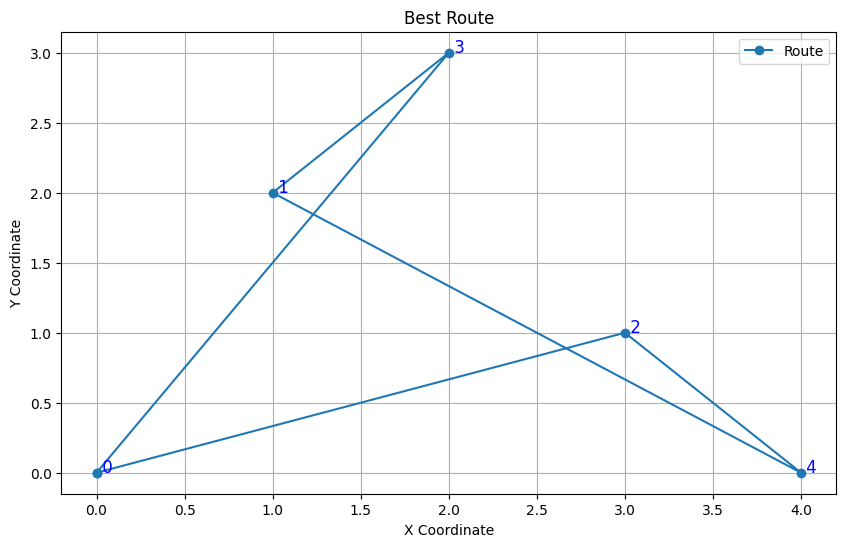

In [10]:
import matplotlib.pyplot as plt

# Function to plot the route
def plot_route(route, locations):
    # Extracting x and y coordinates of locations
    x_coords = [locations[i][0] for i in route]
    y_coords = [locations[i][1] for i in route]

    # Adding the starting point to the end to close the loop
    x_coords.append(x_coords[0])
    y_coords.append(y_coords[0])

    # Plotting the locations
    plt.figure(figsize=(10, 6))
    plt.plot(x_coords, y_coords, '-o', label='Route')

    # Annotating the locations with their index
    for i, (x, y) in enumerate(locations):
        plt.text(x, y, f' {i}', color='blue', fontsize=12)

    # Enhancing the plot
    plt.title('Best Route')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.legend()
    plt.grid(True)
    plt.show()

# Assuming `best_route` and `locations` are defined from your genetic algorithm function
# Note: Convert `best_route` to a list if it's an np.array
best_route_list = best_route.tolist() if isinstance(best_route, np.ndarray) else best_route
plot_route(best_route_list, locations)